# Data Splitting
### Import relevant libraries for data splitting

In [1]:
import numpy as np 
import pandas as pd 
from scipy import stats
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('cleandata.csv')

In [3]:
data

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,result,grade
0,0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,17,Low
1,1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,16,Low
2,2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,25,Average
3,3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,44,High
4,4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,26,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1039,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,31,Average
1040,1040,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,46,High
1041,1041,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,32,Average
1042,1042,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,30,Average


In [4]:
columns_to_remove = ['Unnamed: 0', 'school', 'reason','guardian']
data = data.drop(columns=columns_to_remove, axis=1)

In [5]:
data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,result,grade
0,F,18,U,GT3,A,4,4,at_home,teacher,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,17,Low
1,F,17,U,GT3,T,1,1,at_home,other,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,16,Low
2,F,15,U,LE3,T,1,1,at_home,other,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,25,Average
3,F,15,U,GT3,T,4,2,health,services,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,44,High
4,F,16,U,GT3,T,3,3,other,other,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,26,Average


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         1044 non-null   object
 1   age         1044 non-null   int64 
 2   address     1044 non-null   object
 3   famsize     1044 non-null   object
 4   Pstatus     1044 non-null   object
 5   Medu        1044 non-null   int64 
 6   Fedu        1044 non-null   int64 
 7   Mjob        1044 non-null   object
 8   Fjob        1044 non-null   object
 9   traveltime  1044 non-null   int64 
 10  studytime   1044 non-null   int64 
 11  failures    1044 non-null   int64 
 12  schoolsup   1044 non-null   object
 13  famsup      1044 non-null   object
 14  paid        1044 non-null   object
 15  activities  1044 non-null   object
 16  nursery     1044 non-null   object
 17  higher      1044 non-null   object
 18  internet    1044 non-null   object
 19  romantic    1044 non-null   object
 20  famrel  

In [7]:
data.columns

Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
       'Fjob', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup',
       'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'result', 'grade'],
      dtype='object')

In [8]:
columns_to_remove = ['sex', 'paid', 'nursery','famsup']
cat_data = data.drop(columns=columns_to_remove, axis=1)

## Encode Categorical Data 

In [9]:
student_data=pd.get_dummies(cat_data,columns=["address","famsize","Pstatus","Mjob","Fjob", 'schoolsup', 'activities', 'higher', 'internet', 'romantic' ])

# Convert all boolean columns to integers
bool_cols = [col for col in student_data.columns if student_data[col].dtype == bool]
student_data[bool_cols] = student_data[bool_cols].astype(int)

# Display the data types to confirm the conversion
print(student_data[bool_cols].dtypes)

test_grade=student_data["grade"]
testresult=student_data["result"]
train_temp=student_data.drop(['result','grade'],axis=1)
train_catdata=train_temp.values

address_R         int32
address_U         int32
famsize_GT3       int32
famsize_LE3       int32
Pstatus_A         int32
Pstatus_T         int32
Mjob_at_home      int32
Mjob_health       int32
Mjob_other        int32
Mjob_services     int32
Mjob_teacher      int32
Fjob_at_home      int32
Fjob_health       int32
Fjob_other        int32
Fjob_services     int32
Fjob_teacher      int32
schoolsup_no      int32
schoolsup_yes     int32
activities_no     int32
activities_yes    int32
higher_no         int32
higher_yes        int32
internet_no       int32
internet_yes      int32
romantic_no       int32
romantic_yes      int32
dtype: object


In [10]:
train_temp

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,schoolsup_no,schoolsup_yes,activities_no,activities_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,19,2,3,1,3,1,5,4,2,1,2,5,4,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0
1040,18,3,1,1,2,0,4,3,4,1,1,1,4,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0
1041,18,1,1,2,2,0,1,1,1,1,1,5,6,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0
1042,17,3,1,2,1,0,2,4,5,3,4,2,6,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0


In [11]:
testresult

0       17
1       16
2       25
3       44
4       26
        ..
1039    31
1040    46
1041    32
1042    30
1043    32
Name: result, Length: 1044, dtype: int64

**Taking age variable and seeing the correlation**

<Axes: xlabel='age', ylabel='result'>

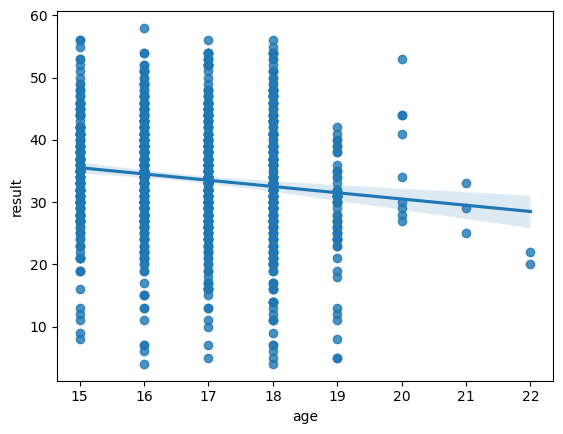

In [12]:
#Comparing age with marks
sns.regplot(x="age",y="result",data=data)

In [13]:
# Pearson coeffiecient
data[["age","result"]].corr()
# P-value
pearson_coef , p_value=stats.pearsonr(data["age"],data["result"])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

,age,result
age,1.000000,-0.129135
result,-0.129135,1.000000


The Pearson Correlation Coefficient is -0.12913452270388823  with a P-value of P = 2.8516659922090616e-05


Age is not that good a factor.

In [14]:
import statsmodels.api as sm
X=np.append(arr=np.ones((1044,1)).astype(int),values=train_catdata,axis=1)
X_opt = X[:, [0, 1, 2, 3, 4,5,6,7,8,9,10,11,12,13]]
regressor_ols=sm.OLS(endog=testresult,exog=X_opt).fit()
regressor_ols.summary()

X_opt = X[:, [0,2,3,4,5,6,7,8,9,10,11,12,13]]
regressor_ols=sm.OLS(endog=testresult,exog=X_opt).fit()
regressor_ols.summary()

X_opt = X[:, [0,2,3,4,5,6,7,9,10,11,12,13]]
regressor_ols=sm.OLS(endog=testresult,exog=X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 result   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     21.75
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           3.72e-46
Time:                        17:42:44   Log-Likelihood:                -3721.7
No. Observations:                1044   AIC:                             7471.
Df Residuals:                    1030   BIC:                             7541.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.8534      4.264      7.470      0.000      23.486      40.221
x1             0.0597      0.230      0.259      0.796      -0.392       0.512
x2             1.0750      0.316      3.399      0.001       0.454       1.696
x3             0.3227      0.320      1.009      0.313      -0.305       0.950
x4            -0.5901      0.380     -1.555      0.120      -1.335       0.155
x5             1.2456      0.334      3.728      0.000       0.590       1.901
x6            -4.8551      0.440    -11.034      0.000      -5.719      -3.992
x7             0.3194      0.295      1.084      0.279      -0.259       0.898
x8             0.0771      0.280      0.276      0.783      -0.472       0.626
x9            -0.5983      0.269     -2.227      0.026      -1.125      -0.071
x10           -0.6968      0.381     -1.828      0.068      -1.445       0.051
x11            0.1181      0.290      0.407      0.684      -0.451       0.687
x12           -0.4192      0.191     -2.189      0.029      -0.795      -0.043
x13           -0.0563      0.044     -1.272      0.204      -0.143       0.031
==============================================================================
Omnibus:                       41.157   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.312
Skew:                          -0.429   Prob(JB):                     1.96e-11
Kurtosis:                       3.631   Cond. No.                         312.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 result   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     23.58
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           7.71e-47
Time:                        17:42:44   Log-Likelihood:                -3721.7
No. Observations:                1044   AIC:                             7469.
Df Residuals:                    1031   BIC:                             7534.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.8280      2.009     16.344      0.000      28.887      36.769
x1             1.0709      0.316      3.391      0.001       0.451       1.690
x2             0.3186      0.319      0.998      0.319      -0.308       0.945
x3            -0.5908      0.379     -1.558      0.120      -1.335       0.154
x4             1.2507      0.333      3.751      0.000       0.596       1.905
x5            -4.8270      0.426    -11.324      0.000      -5.663      -3.991
x6             0.3225      0.294      1.096      0.273      -0.255       0.900
x7             0.0728      0.279      0.261      0.794      -0.475       0.620
x8            -0.5920      0.267     -2.214      0.027      -1.117      -0.067
x9            -0.6887      0.380     -1.813      0.070      -1.434       0.057
x10            0.1170      0.290      0.404      0.687      -0.452       0.686
x11           -0.4211      0.191     -2.201      0.028      -0.796      -0.046
x12           -0.0549      0.044     -1.249      0.212      -0.141       0.031
==============================================================================
Omnibus:                       40.540   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.460
Skew:                          -0.425   Prob(JB):                     3.00e-11
Kurtosis:                       3.625   Cond. No.                         79.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 result   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     25.74
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           1.53e-47
Time:                        17:42:44   Log-Likelihood:                -3721.7
No. Observations:                1044   AIC:                             7467.
Df Residuals:                    1032   BIC:                             7527.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.9644      1.938     17.005      0.000      29.161      36.768
x1             1.0713      0.316      3.394      0.001       0.452       1.691
x2             0.3185      0.319      0.998      0.318      -0.308       0.945
x3            -0.5947      0.379     -1.570      0.117      -1.338       0.149
x4             1.2449      0.333      3.743      0.000       0.592       1.897
x5            -4.8181      0.425    -11.344      0.000      -5.652      -3.985
x6             0.3311      0.292      1.133      0.258      -0.243       0.905
x7            -0.5717      0.256     -2.235      0.026      -1.074      -0.070
x8            -0.6801      0.378     -1.798      0.072      -1.422       0.062
x9             0.1130      0.289      0.391      0.696      -0.455       0.681
x10           -0.4177      0.191     -2.190      0.029      -0.792      -0.043
x11           -0.0556      0.044     -1.269      0.205      -0.142       0.030
==============================================================================
Omnibus:                       40.630   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.582
Skew:                          -0.426   Prob(JB):                     2.82e-11
Kurtosis:                       3.625   Cond. No.                         73.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
train_x=np.concatenate((X_opt,X[:,14:49]),axis=1)
data[["Medu","result"]].corr()
data[["Fedu","result"]].corr()

,Medu,result
Medu,1.000000,0.226919
result,0.226919,1.000000


,Fedu,result
Fedu,1.00000,0.18661
result,0.18661,1.00000


In [16]:
#Getting rid of age and freetime variables
train_temp2=train_temp.drop(["age","freetime"],axis=1)
np1=[1 for i in range(0,1044)]
train_temp2.insert(loc=0,column= "notimpt", value=np1)

In [17]:
train_temp2.columns
train_temp2.head(30)

Index(['notimpt', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'schoolsup_no', 'schoolsup_yes',
       'activities_no', 'activities_yes', 'higher_no', 'higher_yes',
       'internet_no', 'internet_yes', 'romantic_no', 'romantic_yes'],
      dtype='object')

,notimpt,Medu,Fedu,traveltime,studytime,failures,famrel,goout,Dalc,Walc,health,absences,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,schoolsup_no,schoolsup_yes,activities_no,activities_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1,4,4,2,2,0,4,4,1,1,3,6,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0
1,1,1,1,1,2,0,5,3,1,1,3,4,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0
2,1,1,1,1,2,3,4,2,2,3,3,10,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0
3,1,4,2,1,3,0,3,2,1,1,5,2,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1
4,1,3,3,1,2,0,4,2,1,2,5,4,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0
5,1,4,3,1,2,0,5,2,1,2,5,10,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0
6,1,2,2,1,2,0,4,4,1,1,3,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0
7,1,4,4,2,2,0,4,4,1,1,1,6,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0
8,1,3,2,1,2,0,4,2,1,1,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0
9,1,3,4,1,2,0,5,1,1,1,5,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0


## Splitting the Dataset

In [18]:
X_train, X_test, y_train, y_test = train_test_split(train_x, test_grade, test_size=0.2, random_state=0)

In [19]:
# Convert numpy arrays to pandas DataFrames (if they are not DataFrames)
X_train_df = pd.DataFrame(X_train, columns=train_temp2.columns)
X_test_df = pd.DataFrame(X_test, columns=train_temp2.columns)
y_train_df = pd.DataFrame(y_train, columns=['grade'])
y_test_df = pd.DataFrame(y_test, columns=['grade'])

# Save to CSV files
#X_train_df.to_csv('features_train.csv', index=False)
#X_test_df.to_csv('features_test.csv', index=False)
#y_train_df.to_csv('target_train.csv', index=False)
#y_test_df.to_csv('target_test.csv', index=False)